In [1]:
%run ../__init__.ipynb

In [2]:
df_clinvar = read_clinvar(nrows=None).query('clinvar_label == "Pathogenic"').rename({'variant_id': 'protein_variant'}, axis=1)[['protein_variant']]
df_clinvar[['isin_clinvar']] = True
df_clinvar

read_clinvar: 1,857,854 rows from /cluster/work/beltrao/jjaenes/23.06.02_clinvar/24.04.22_protvar_out/clinvar_mapped.tsv
read_clinvar: 1,761,408 after removing conflicting/other variants


,protein_variant,isin_clinvar
1070,O00468-6/G76S,True
2385,A0A494C1I6/V1622F,True
2582,A0A494C1I6/N1888S,True
3005,Q96L58/M1V,True
3006,Q96L58/M1K,True
...,...,...
1761092,P03923/G36S,True
1761138,P00156/G34S,True
1761226,P00156/G157R,True
1761239,P00156/G166R,True


In [3]:
df_pharmgkb = read_pharmgkb().rename({'variant_id': 'protein_variant'}, axis=1)[['protein_variant']]
df_pharmgkb['isin_pharmgkb'] = True

In [4]:
df_intact = read_intact_mutations().query('effect == "disrupt/decrease"').rename({'variant_id': 'protein_variant'}, axis=1)[['protein_variant']]
df_intact[['isin_intact']] = True
df_intact

read_intact_mutations: 78,139 IntAct mutations
read_intact_mutations: 78,119 with defined `Interaction participants`
read_intact_mutations: 70,031 with exactly two participants
read_intact_mutations: 70,031 after parsing participants
read_intact_mutations: 54,369 after filtering participant A for human
read_intact_mutations: 49,495 after filtering participant B for human
read_intact_mutations: 39,919 single-residue substititions
read_intact_mutations: 39,919 effects - neutral: 20042 disrupt/decrease: 16224 no data on effect: 2007 cause/increase: 1646
read_intact_mutations: 32,857 after de-duplication


,protein_variant,isin_intact
1644,P50402/G214A,True
1645,P50402/L217A,True
1646,Q92793/L22Q,True
1647,Q92793/W23S,True
1648,Q9UJY5/Q566R,True
...,...,...
13806,Q9UPQ8/Y441S,True
13807,Q9UI47-2/V94D,True
13808,Q9NZ01/P182L,True
13809,Q9UPQ8/Y441S,True


In [5]:
df_cancer = read_Cheng2023_s6().query('label == 1')
df_cancer['isin_cancer'] = True
df_ddd = read_Cheng2023_s7().query('label == 1')
df_ddd['isin_ddd'] = True

clinvar_ = set(df_clinvar.protein_variant)
cancer_ = set(df_cancer.protein_variant)
ddd_ = set(df_ddd.protein_variant)
pharmgkb_ = set(df_pharmgkb.protein_variant)
printlen(clinvar_, 'ClinVar pathogenic variants')
printlen(cancer_, 'Cancer hotspot variants')
printlen(ddd_, 'DDD de novo variants')
printlen(pharmgkb_, 'PharmGKB variants')
printlen(clinvar_ | cancer_ | ddd_ | pharmgkb_, 'variants total')

46,898 ClinVar pathogenic variants
868 Cancer hotspot variants
353 DDD de novo variants
1,052 PharmGKB variants
48,774 variants total


In [6]:
df_var = merge_missense(pd.concat([
    df_clinvar[['protein_variant', 'isin_clinvar']].drop_duplicates().set_index('protein_variant'),
    df_cancer[['protein_variant', 'isin_cancer']].drop_duplicates().set_index('protein_variant'),
    df_ddd[['protein_variant', 'isin_ddd']].drop_duplicates().set_index('protein_variant'),
    df_pharmgkb[['protein_variant', 'isin_pharmgkb']].drop_duplicates().set_index('protein_variant'),
    df_intact[['protein_variant', 'isin_intact']].drop_duplicates().set_index('protein_variant'),
], axis=1).fillna(False).reset_index(), variant_col='protein_variant')
df_var

merge_missense: 58,386 raw records
merge_missense: 58,386 records matched to predictions
merge_missense: 19,202 annotated as destabilizing
merge_missense: 8,705 annotated with interfaces at pDockQ > 0.23
merge_missense: 18,741 annotated with pockets at pocket_score > 800


,protein_variant,isin_clinvar,isin_cancer,isin_ddd,isin_pharmgkb,isin_intact,am_pathogenicity,am_class,am_label,pred_ddg,pred_ddg_label,interface_pdockq,interface_label,pocket_label,mechanistic_label
0,O00468-6/G76S,True,False,False,False,False,NaN,NaN,False,NaN,False,NaN,False,False,Unassigned
1,A0A494C1I6/V1622F,True,False,False,False,False,NaN,NaN,False,NaN,False,NaN,False,False,Unassigned
2,A0A494C1I6/N1888S,True,False,False,False,False,NaN,NaN,False,NaN,False,NaN,False,False,Unassigned
3,Q96L58/M1V,True,False,False,False,False,0.1523,benign,False,0.984979,False,NaN,False,False,Unassigned
4,Q96L58/M1K,True,False,False,False,False,0.3874,ambiguous,False,0.737538,False,NaN,False,False,Unassigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,Q9UKT9/R195C,False,False,False,False,True,NaN,NaN,False,NaN,False,NaN,False,True,Unassigned
58382,Q3B820/L330F,False,False,False,False,True,NaN,NaN,False,NaN,False,NaN,False,False,Unassigned
58383,Q9HCM9/E391K,False,False,False,False,True,NaN,NaN,False,NaN,False,NaN,False,False,Unassigned
58384,Q12824/K364.,False,False,False,False,True,NaN,NaN,False,NaN,False,NaN,False,True,Unassigned


In [7]:
data_ = pd.concat([
    df_var.query('am_class == "pathogenic" & isin_clinvar')['mechanistic_label'].value_counts(normalize=True).to_frame(name='frac').assign(data='ClinVar'),
    df_var.query('am_class == "pathogenic" & isin_ddd')['mechanistic_label'].value_counts(normalize=True).to_frame(name='frac').assign(data='DDD'),
    df_var.query('am_class == "pathogenic" & isin_pharmgkb')['mechanistic_label'].value_counts(normalize=True).to_frame(name='frac').assign(data='PharmGKB'),
    df_var.query('am_class == "pathogenic" & isin_cancer')['mechanistic_label'].value_counts(normalize=True).to_frame(name='frac').assign(data='Cancer Hotspots'),
    df_var.query('am_class == "pathogenic" & isin_intact')['mechanistic_label'].value_counts(normalize=True).to_frame(name='frac').assign(data='IntAct'),
], axis=0).reset_index().rename({'index': 'mechanism', 'data': 'Dataset'}, axis=1)
data_

,mechanistic_label,frac,Dataset
0,Stability,0.483458,ClinVar
1,Unassigned,0.273220,ClinVar
2,Pockets,0.143181,ClinVar
3,Interface,0.100141,ClinVar
4,Unassigned,0.416988,DDD
5,Stability,0.335907,DDD
6,Pockets,0.135135,DDD
7,Interface,0.111969,DDD
8,Stability,0.533019,PharmGKB
9,Pockets,0.207547,PharmGKB


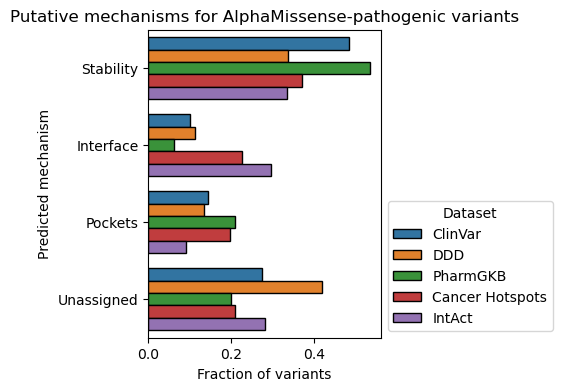

In [8]:
plt.figure(figsize=(3, 4))
plt.title('Putative mechanisms for AlphaMissense-pathogenic variants')
sns.barplot(data_, x='frac', y='mechanistic_label', hue='Dataset', order=['Stability', 'Interface', 'Pockets', 'Unassigned'], edgecolor='0')
plt.gca().set_ylabel('Predicted mechanism')
plt.gca().set_xlabel('Fraction of variants')
sns.move_legend(plt.gca(), 'lower left', bbox_to_anchor=(1, 0))
#plt.gca().set_xlim(0, 1)
plt.savefig('enrichments_by_dataset.svg', bbox_inches='tight', transparent=True)